In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 3.9MB 55.8MB/s 
ERROR: Operation cancelled by user


In [0]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [2]:
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow 2.x selected.
2.1.0
/device:GPU:0
Num GPUs Available:  1


In [0]:
%load_ext autoreload
%autoreload 2
from google.colab import drive
import sys
from pathlib import Path
drive.mount("/content/drive",force_remount=True)

KeyboardInterrupt: ignored

In [3]:
from pathlib import Path
import sys

base=Path('/content/drive/My Drive/fairface-img-margin025-trainval.zip')
sys.path.append(str(base))

%time
!cp "{base}" .
!unzip -q "/content/drive/My Drive/fairface-img-margin025-trainval.zip"
#!rm "/content/drive/My Drive/fairface-img-margin025-trainval.zip"

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.53 µs


# New Section

START


Label Map:  {'East Asian': 0, 'White': 1, 'Latino_Hispanic': 2, 'Southeast Asian': 3, 'Black': 4, 'Indian': 5, 'Middle Eastern': 6}
No. of Labels are:  7
Total No. of samples 10954
{'East Asian': 1549, 'White': 2084, 'Latino_Hispanic': 1622, 'Southeast Asian': 1414, 'Black': 1555, 'Indian': 1515, 'Middle Eastern': 1208}


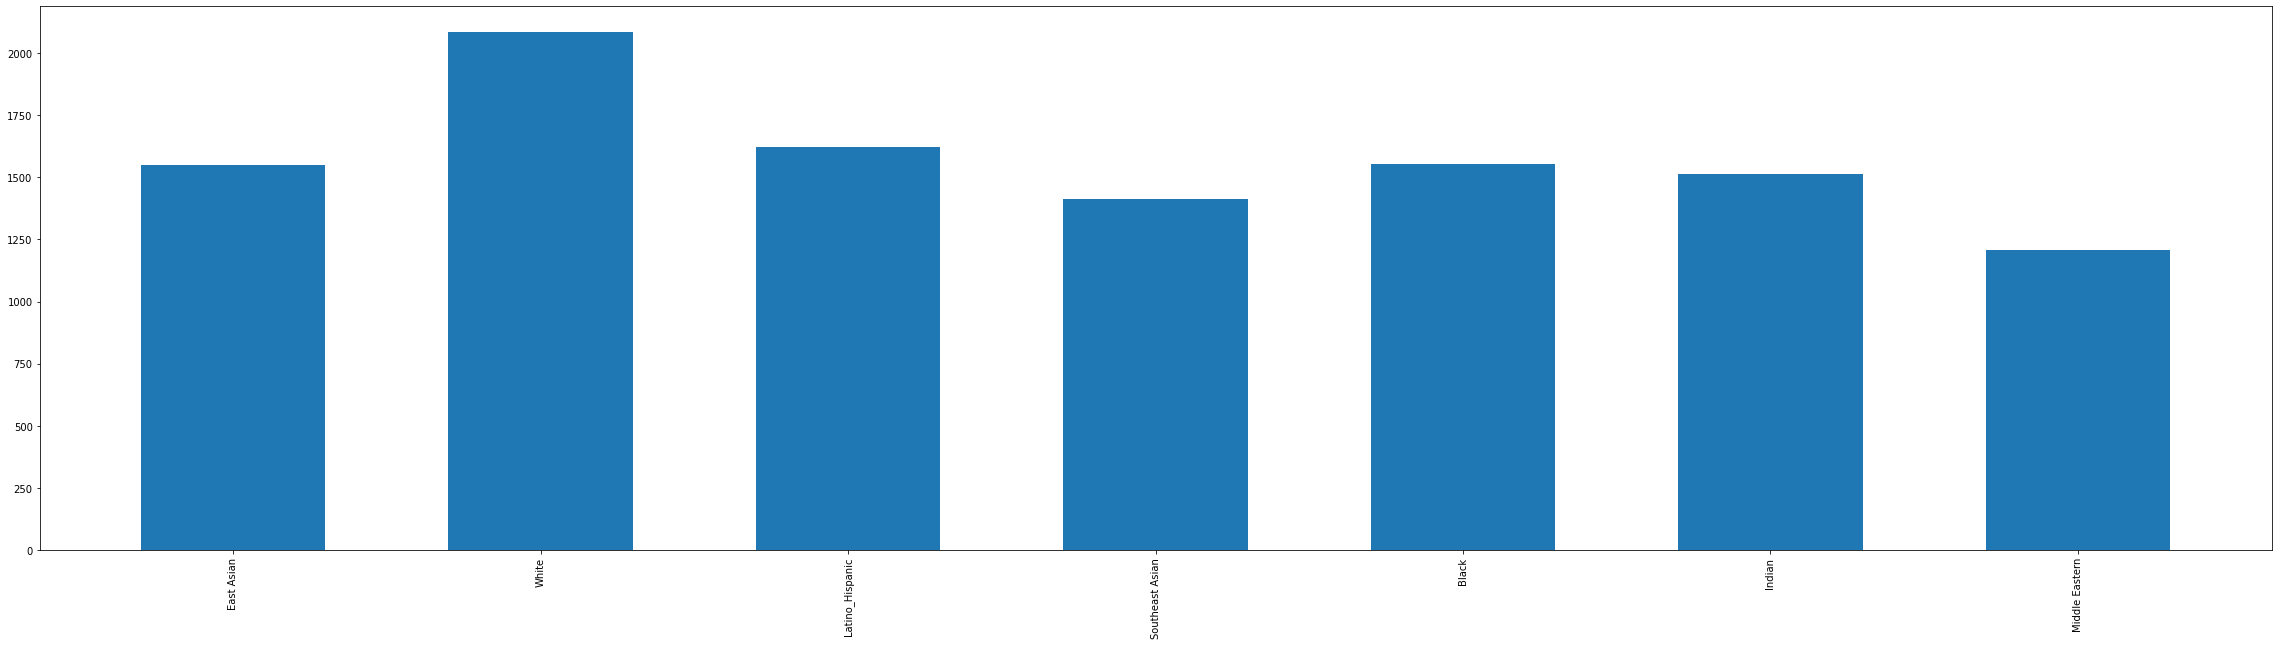

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os, random, cv2
%matplotlib inline
train_df = pd.read_csv("/content/drive/My Drive/train.csv")
val_df=pd.read_csv("/content/drive/My Drive/val.csv")
val_df.head()
labels_map = {}
inv_labels_map = {}
count = 0
num_samples=0
for label in val_df['race']:
  num_samples=num_samples+1
  if(label in labels_map):
    continue
  labels_map[label] = count
  inv_labels_map[count] = label
  count=count+1
print("Label Map: ", labels_map)
print("No. of Labels are: ", count)
print("Total No. of samples",num_samples)
labels_count = {}
for label in val_df['race']:
  if(label in labels_count):
    labels_count[label] = labels_count[label] + 1
  else:
    labels_count[label] = 0
print(labels_count)
plt.figure(figsize=(40,10))
plt.bar(list(labels_count.keys()), list(labels_count.values()),width=0.6)
plt.xticks(rotation = 90)
plt.show()

In [0]:
train_df

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True
...,...,...,...,...,...
86739,train/86740.jpg,20-29,Male,Indian,True
86740,train/86741.jpg,10-19,Male,Indian,True
86741,train/86742.jpg,more than 70,Female,Indian,True
86742,train/86743.jpg,10-19,Female,Black,True


Label: True
Shape of the image is: (224, 224, 3)
Max: 203 , Min: 0


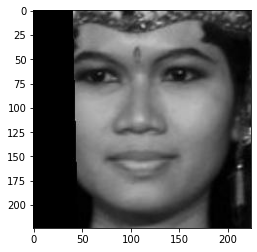

In [0]:
example_img = random.choice(os.listdir("train"))
print("Label:", train_df.loc[train_df['file'] == example_img[:-4]]['race'].all())
example_img = plt.imread("train/"+example_img)
plt.grid(False)
plt.imshow(example_img)
print("Shape of the image is:", example_img.shape)
print("Max:", example_img.max(), ", Min:", example_img.min())


In [0]:
for layer in model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = True
for layer in model.layers:
        if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
            layer.trainable = True
            K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
            K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
        else:
            layer.trainable = False

NameError: ignored

In [0]:
from tensorflow.keras.applications.xception import Xception,preprocess_input
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D,Flatten,Dropout,BatchNormalization,InputLayer
from tensorflow.keras.models import Model

K.set_learning_phase(0)

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3),pooling='avg')

for layer in base_model.layers:
    layer.trainable = False

K.set_learning_phase(1)

base=Dense(7, activation='softmax')(base_model.output)
model=Model(base_model.input,base)
model.compile(loss='categorical_crossentropy',
             optimizer=SGD(lr=0.045, momentum=0.9,decay=0.5), 
             metrics=['accuracy'])

In [0]:

from tensorflow.keras.layers import Dense,GlobalMaxPooling2D,Flatten,Dropout,BatchNormalization,InputLayer
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.applications.xception import Xception,preprocess_input
reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_delta=1E-7)
nn=Xception(include_top=False, layers=tf.keras.layers,weights='imagenet',input_shape=(224,224,3),pooling='avg')
nn.trainable = True
for layer in nn.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
output=Dense(7,activation='softmax')(nn.output)
model=Model(nn.input,output)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(0.001),
              metrics=['accuracy'])

layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_2,True
1,<tensorflow.python.keras.layers.convolutional....,block1_conv1,True
2,<tensorflow.python.keras.layers.normalization_...,block1_conv1_bn,True
3,<tensorflow.python.keras.layers.core.Activatio...,block1_conv1_act,True
4,<tensorflow.python.keras.layers.convolutional....,block1_conv2,True
...,...,...,...
129,<tensorflow.python.keras.layers.convolutional....,block14_sepconv2,True
130,<tensorflow.python.keras.layers.normalization_...,block14_sepconv2_bn,True
131,<tensorflow.python.keras.layers.core.Activatio...,block14_sepconv2_act,True
132,<tensorflow.python.keras.layers.pooling.Global...,global_average_pooling2d_1,True


In [0]:

nn.trainable = True
for layer in nn.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0005),
              metrics=['accuracy'])

layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

In [0]:
layers = [(layer, layer.name, layer.trainable) for layer in model.layers[0].layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])
from tensorflow.keras.optimizers import Adam
#model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0005),metrics=['accuracy']) 

In [0]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/My Drive/CV6.h5')

In [0]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D,Flatten,Dropout,BatchNormalization,InputLayer
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.applications.xception import Xception,preprocess_input
model=load_model('/content/drive/My Drive/CV6.h5')
reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_delta=1E-7) 
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                    rotation_range=10,
                                   width_shift_range=0.2,
                                    height_shift_range=0.2,
                                     shear_range=0.2,
                                    zoom_range=0.2,
                                   preprocessing_function=preprocess_input,)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)

train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
directory="/content",
x_col="file",
y_col="race",
batch_size=64,
seed=9,
shuffle=True,
class_mode="categorical",
target_size=(224,224))

valid_generator=test_datagen.flow_from_dataframe(
dataframe=val_df,
directory="/content",
x_col="file",
y_col="race",
batch_size=64,
seed=8,
shuffle=True,
class_mode="categorical",
target_size=(224,224))
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
early = EarlyStopping(monitor='accuracy', min_delta=0, patience=10, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("CV6.h5", monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history = model.fit_generator(generator=train_generator,
                         steps_per_epoch=STEP_SIZE_TRAIN,
                         epochs=10,
                         validation_data=valid_generator,
                         validation_steps=STEP_SIZE_VALID,callbacks=[early,checkpoint,reduce])
model.save('CV6.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


NameError: ignored

In [0]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
early = EarlyStopping(monitor='accuracy', min_delta=0, patience=10, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("CV4.h5", monitor='accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history = model.fit(generator=train_generator,
                         steps_per_epoch=STEP_SIZE_TRAIN,
                         epochs=10,
                         validation_data=valid_generator,
                         validation_steps=STEP_SIZE_VALID,callbacks=[early,checkpoint,reduce])
model.save('CV4.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2710 steps, validate for 342 steps
Epoch 1/10
2710/2710 [==============================] - 1063s 392ms/step - loss: 1.4415 - accuracy: 0.4330 - val_loss: 1.2207 - val_accuracy: 0.5601
Epoch 2/10
2710/2710 [==============================] - 1048s 387ms/step - loss: 1.1257 - accuracy: 0.5698 - val_loss: 1.3048 - val_accuracy: 0.5388
Epoch 3/10
2710/2710 [==============================] - 1048s 387ms/step - loss: 1.0397 - accuracy: 0.6036 - val_loss: 1.2630 - val_accuracy: 0.5773
Epoch 4/10
2710/2710 [==============================] - 1047s 386ms/step - loss: 0.9877 - accuracy: 0.6227 - val_loss: 1.0862 - val_accuracy: 0.5888
Epoch 5/10
2710/2710 [==============================] - 1047s 386ms/step - loss: 0.9486 - accuracy: 0.6400 - val_loss: 1.2792 - val_accuracy: 0.5466
Epoch 6/10
2710/2710 [==============================] - 1047s 386ms/step - loss: 0.9

In [0]:
model.save('CV6.h5')

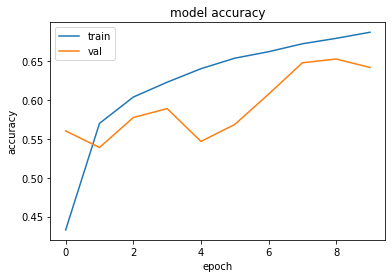

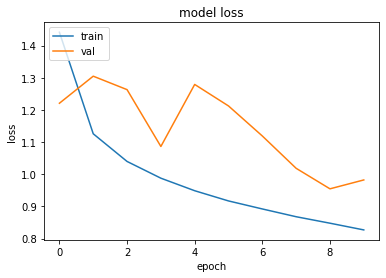

In [0]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)
valid_generator=test_datagen.flow_from_dataframe(
dataframe=val_df,
directory="/content",
x_col="file",
y_col="race",
batch_size=64,
seed=8,
shuffle=True,
class_mode="categorical",
classes=['East Asian', 'Indian', 'Black', 'White','Middle Eastern', 'Latino_Hispanic', 'Southeast Asian'],
target_size=(224,224))

STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
model.evaluate_generator(generator=valid_generator,
steps=STEP_SIZE_VALID)

Found 10954 validated image filenames belonging to 7 classes.
  ...
    to  
  ['...']


[0.8235632226481076, 0.70358187]

In [7]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                    rotation_range=10,
                                   width_shift_range=0.2,
                                    height_shift_range=0.2,
                                     shear_range=0.2,
                                    zoom_range=0.2,
                                   preprocessing_function=preprocess_input,)
train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
directory="/content",
x_col="file",
y_col="race",
batch_size=64,
seed=9,
shuffle=True,
class_mode="categorical",
target_size=(224,224))
train_generator.class_indices

Found 86744 validated image filenames belonging to 7 classes.


{'Black': 0,
 'East Asian': 1,
 'Indian': 2,
 'Latino_Hispanic': 3,
 'Middle Eastern': 4,
 'Southeast Asian': 5,
 'White': 6}